In [1]:
from keras.datasets import reuters
import numpy as np
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
train_data.shape, train_labels.shape

((8982,), (8982,))

In [4]:
test_data.shape, test_labels.shape

((2246,), (2246,))

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [6]:
def decoded_sequence(sequences, features=10000):
    result = np.zeros((len(sequences), features))
    for i, sequence in enumerate(sequences):
        result[i, sequence] = 1
    return result

In [7]:
x_train = decoded_sequence(train_data)
x_test = decoded_sequence(test_data)

In [8]:
x_train.shape, x_test.shape

((8982, 10000), (2246, 10000))

In [9]:
y_train = np.asarray(to_categorical(train_labels))
y_test = np.asarray(to_categorical(test_labels))

In [68]:
partial_val_x = x_train[:1000]
partial_val_y = y_train[:1000]
partial_train_x = x_train[1000:]
partial_train_y = y_train[1000:]

In [69]:
y_train.shape, y_test.shape

((8982, 46), (2246, 46))

In [70]:
from keras import models
from keras import layers

In [71]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(partial_train_x, partial_train_y, validation_data=(partial_val_x, partial_val_y), epochs=20)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 7s 920us/step - loss: 1.3595 - acc: 0.6987 - val_loss: 0.9943 - val_acc: 0.7940
Epoch 2/20
7982/7982 [==============================] - 7s 824us/step - loss: 0.6416 - acc: 0.8577 - val_loss: 0.8598 - val_acc: 0.8220
Epoch 3/20
7982/7982 [==============================] - 7s 837us/step - loss: 0.3842 - acc: 0.9157 - val_loss: 0.8915 - val_acc: 0.8170
Epoch 4/20
7982/7982 [==============================] - 6s 798us/step - loss: 0.2803 - acc: 0.9381 - val_loss: 0.9293 - val_acc: 0.8160
Epoch 5/20
7982/7982 [==============================] - 6s 792us/step - loss: 0.2262 - acc: 0.9493 - val_loss: 0.9584 - val_acc: 0.8230
Epoch 6/20
7982/7982 [==============================] - 7s 831us/step - loss: 0.1946 - acc: 0.9525 - val_loss: 1.0827 - val_acc: 0.8150
Epoch 7/20
7982/7982 [==============================] - 6s 805us/step - loss: 0.1814 - acc: 0.9539 - val_loss: 1.1731 - val_acc: 0.8000


In [72]:
history.history.keys()

dict_keys(['val_loss', 'loss', 'acc', 'val_acc'])

In [73]:
import matplotlib.pyplot as plt

In [74]:
def val_train_acc_plot(x_data):
    plt.plot(x_data, history.history['acc'], 'b', label='acc')
    plt.plot(x_data, history.history['val_acc'], 'r', label='val acc')
    plt.legend()
    plt.title('Training Accuracy / Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Acc Rate')
    plt.show()

In [75]:
def val_train_loss_plot(x_data):
    plt.plot(x_data, history.history['loss'], 'b', label='loss')
    plt.plot(x_data, history.history['val_loss'], 'r', label='val loss')
    plt.legend()
    plt.title('Training Loss / Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss Rate')
    plt.show()

In [76]:
x_data = [i for i in range(1, 21)]

In [77]:
def acc_loss(x_data):
    plt.plot(x_data, history.history['acc'], 'b', label='acc')
    plt.plot(x_data, history.history['loss'], 'r', label='loss')
    plt.legend()
    plt.title('Training Accuracy / Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Rate')
    plt.show()

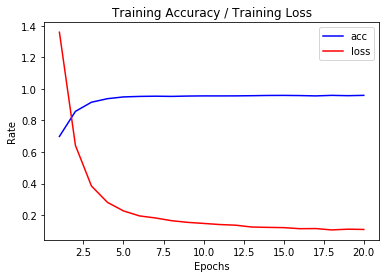

In [78]:
acc_loss(x_data)

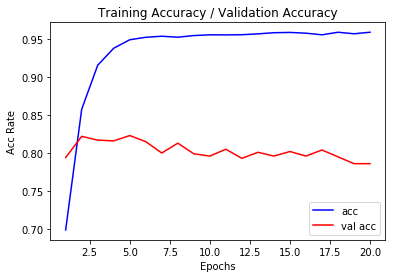

In [79]:
val_train_acc_plot(x_data)

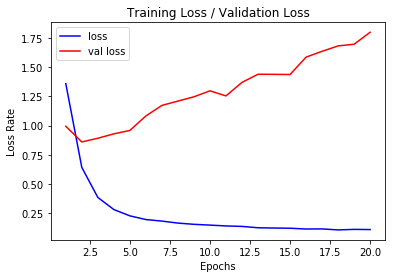

In [80]:
val_train_loss_plot(x_data)

In [82]:
model.evaluate(x_test, y_test, batch_size=128)

2246/2246 [==============================] - 1s 239us/step


[1.9205525367257856, 0.7733748882663961]